In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the data
train_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/MyDataSplit/London_UTD19_train_0.csv'
test_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/MyDataSplit/London_UTD19_test_0.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_data = train_data.drop('day', axis=1)
test_data = test_data.drop('day', axis=1)

In [30]:
def weekday_to_interval(df):
    weekday_to_num = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
    seconds_per_day = 86400
    df['interval'] = df.apply(lambda row: row['interval'] + (weekday_to_num[row['weekday']] * seconds_per_day), axis=1)
    df = df.drop(columns=['weekday'])
    return df

def rfr_regressor_loop(train_data_set, test_data_set, sensors, param_grid):
    
    train_detid_dfs = {detid: data for detid, data in train_data_set.groupby('detid')}
    test_detid_dfs = {detid: data for detid, data in test_data_set.groupby('detid')}
    
    sum_MAE = 0
    sum_MSE = 0
    sum_R2 = 0
    counter = 0

    for sensor in sensors:

        train_data = train_detid_dfs[sensor]
        train_data = train_data.drop('detid', axis=1)
        train_data = weekday_to_interval(train_data)
        
        test_data = test_detid_dfs[sensor]
        test_data = test_data.drop('detid', axis=1)
        test_data = weekday_to_interval(test_data)

        X_train = train_data.drop(['traffic'], axis=1)
        y_train = train_data['traffic']
        
        X_test = test_data.drop(['traffic'], axis=1)
        y_test = test_data['traffic']

        rfr = RandomForestRegressor(random_state=27)
        rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, n_jobs=-1)
        rfr_cv.fit(X_train, y_train)
        y_pred = rfr_cv.predict(X_test)
        
        mae = mean_absolute_error(y_pred, y_test)
        mse = mean_squared_error(y_pred, y_test)
        r2 = r2_score(y_pred, y_test)
        
        sum_MAE += mae
        sum_MSE += mse
        sum_R2 += r2
        counter += 1
        
        plt.figure(figsize=(20,6))
        plt.scatter(X_test, y_test, alpha=0.5, color='red', label='Test data')
        plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
        plt.legend()
        plt.show()

        plt.figure(figsize=(20,6))
        plt.scatter(X_train, y_train, alpha=0.5, color='red', label='Train data')
        plt.scatter(X_test, y_pred, alpha=0.5, color='blue', label='Prediction')
        plt.legend()    
        plt.show()
        
        print('Sensor:', sensor)
        print('MAE:', mae)
        print('MSE:', mse)
        print('R2:', r2)
        print('-----------------------------------')
        
        
    return sum_MAE / counter, sum_MSE / counter, sum_R2 / counter
            
        

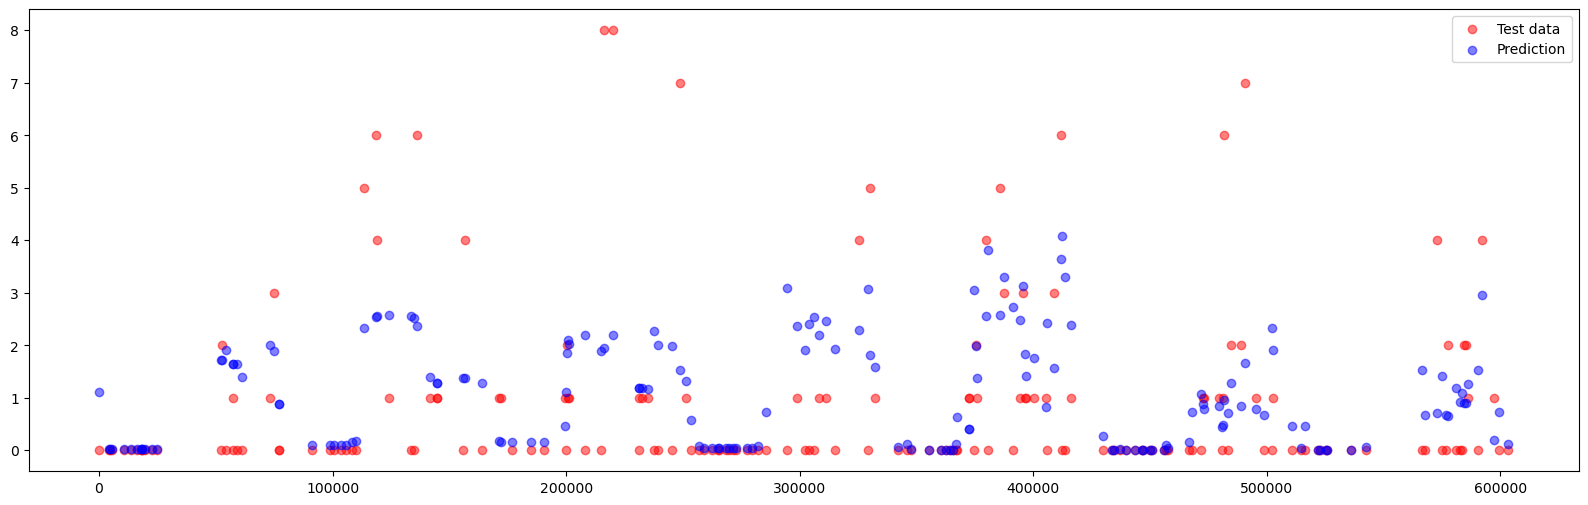

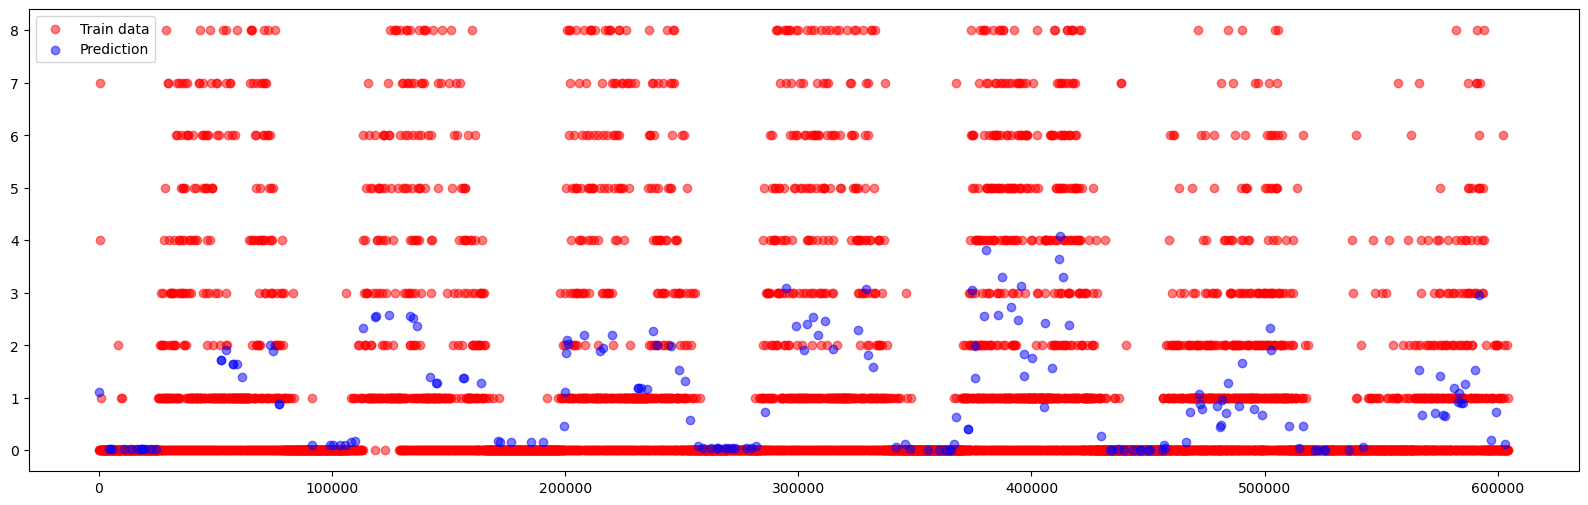

Sensor: EAST_N17/067e1
MAE: 0.9795205640941136
MSE: 2.4765454466614405
R2: -1.3821199485388371
-----------------------------------


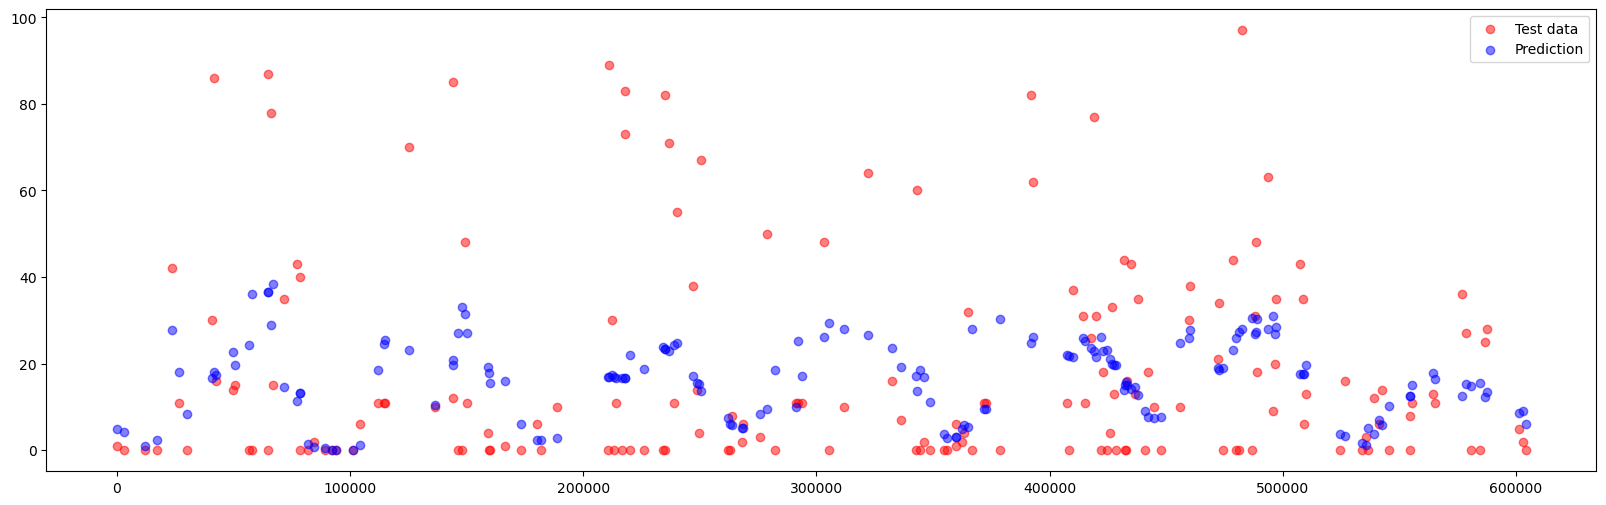

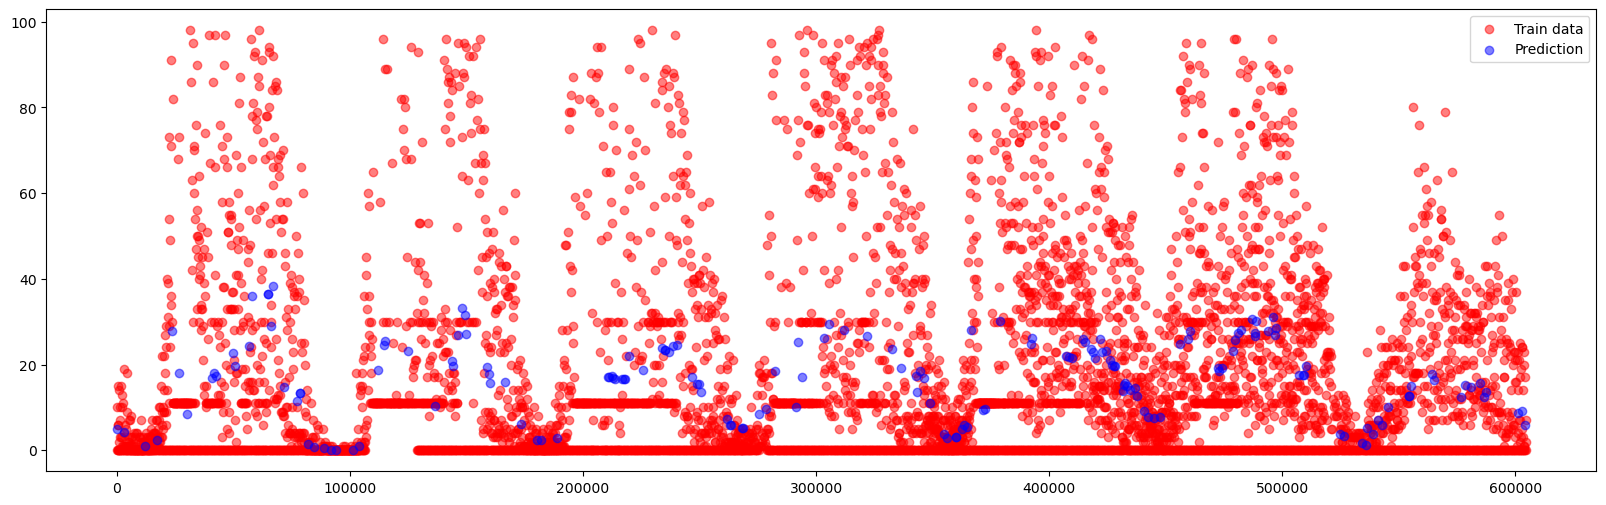

Sensor: CNTR_N01/046c2
MAE: 16.698760645620233
MSE: 529.2746842738154
R2: -5.469641149141453
-----------------------------------


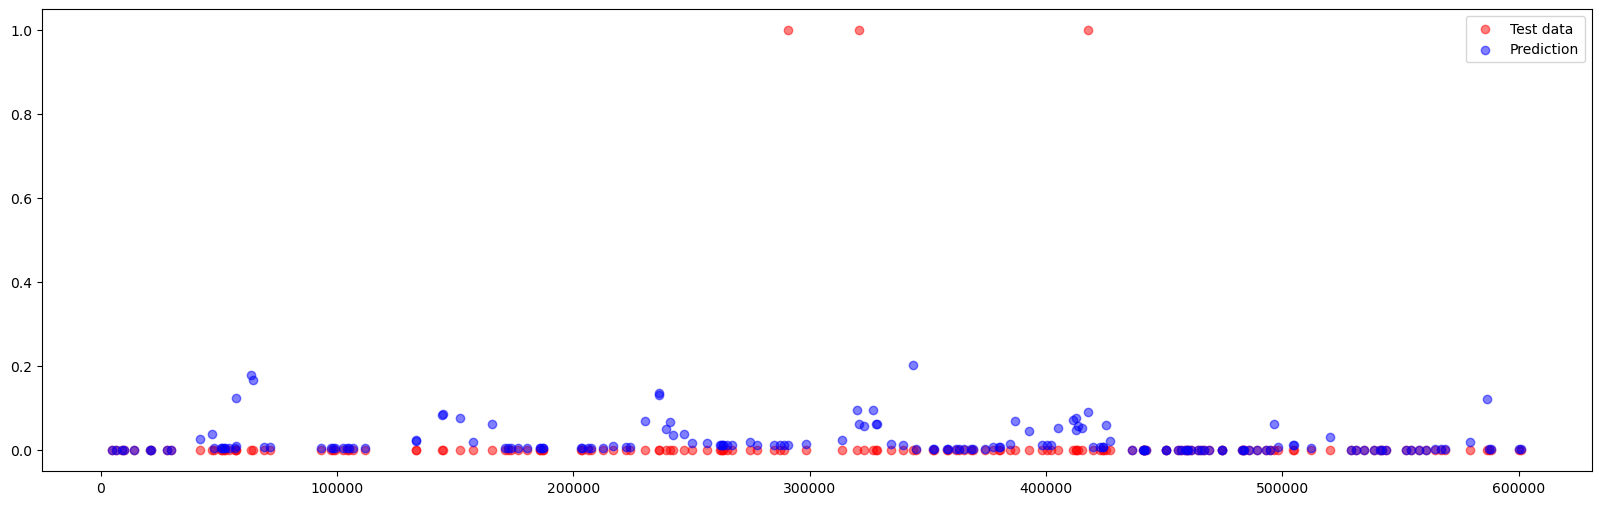

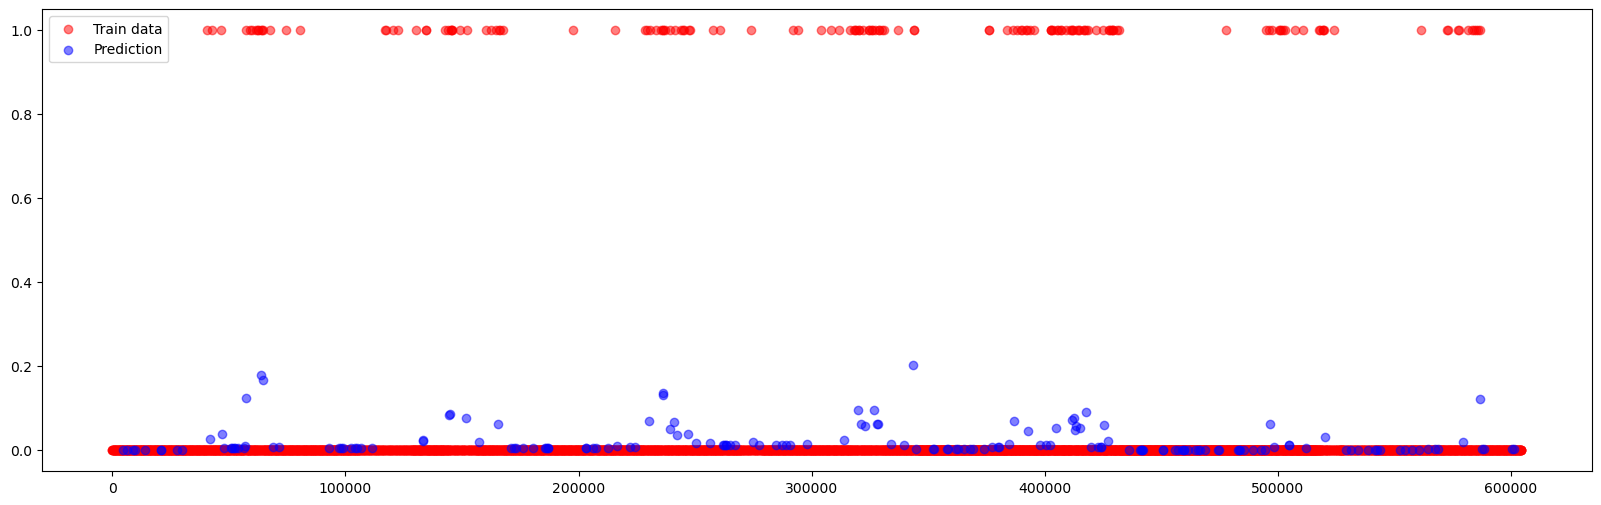

Sensor: SOUT_N06/157a2
MAE: 0.03624998309677433
MSE: 0.016916179966482224
R2: -12.454729736968655
-----------------------------------


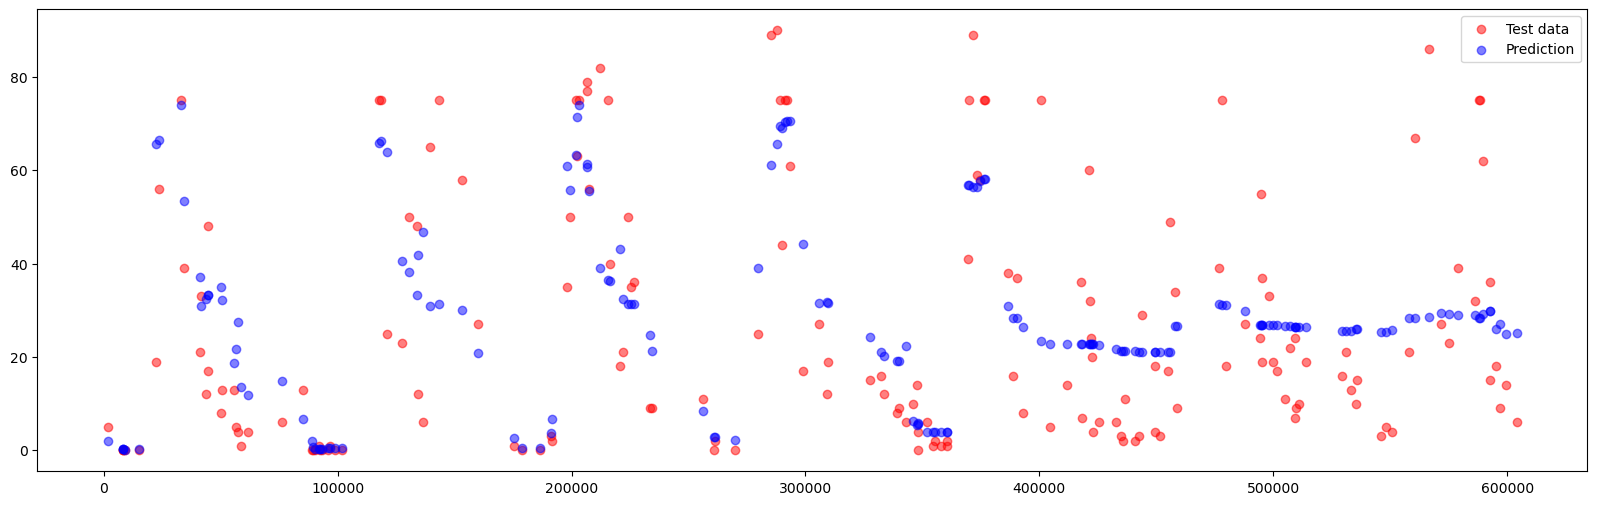

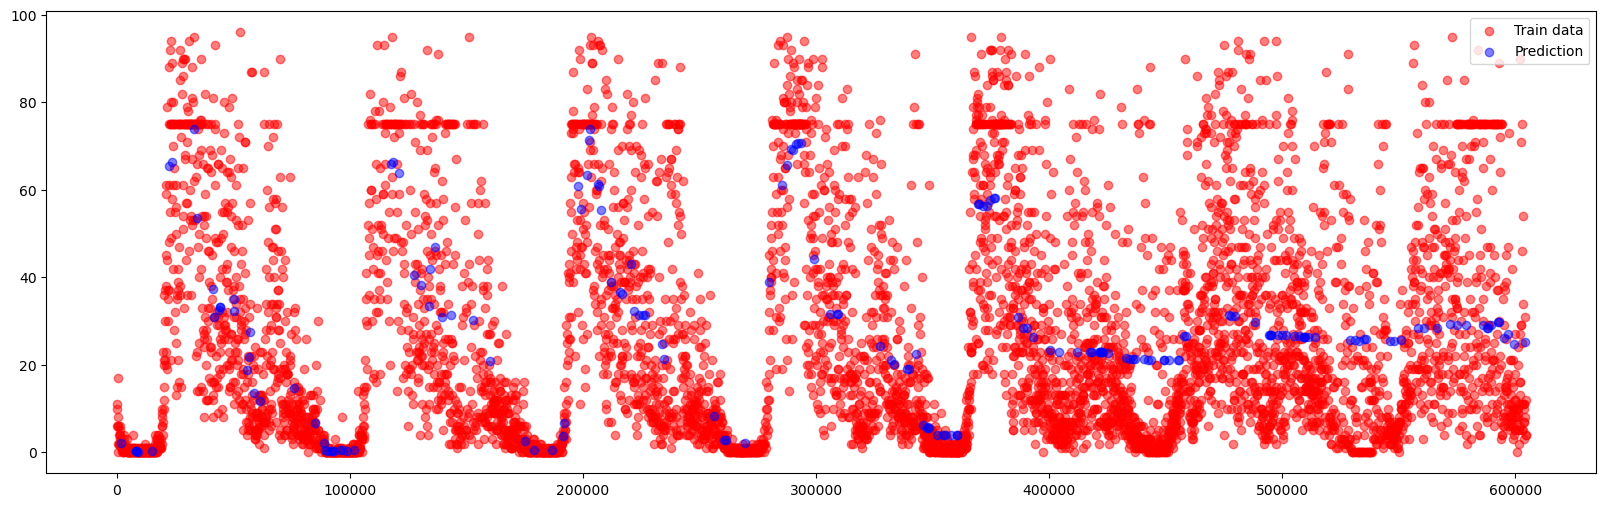

Sensor: EAST_N05/006x1
MAE: 13.042247030466187
MSE: 312.0441846532232
R2: 0.13880830555594514
-----------------------------------


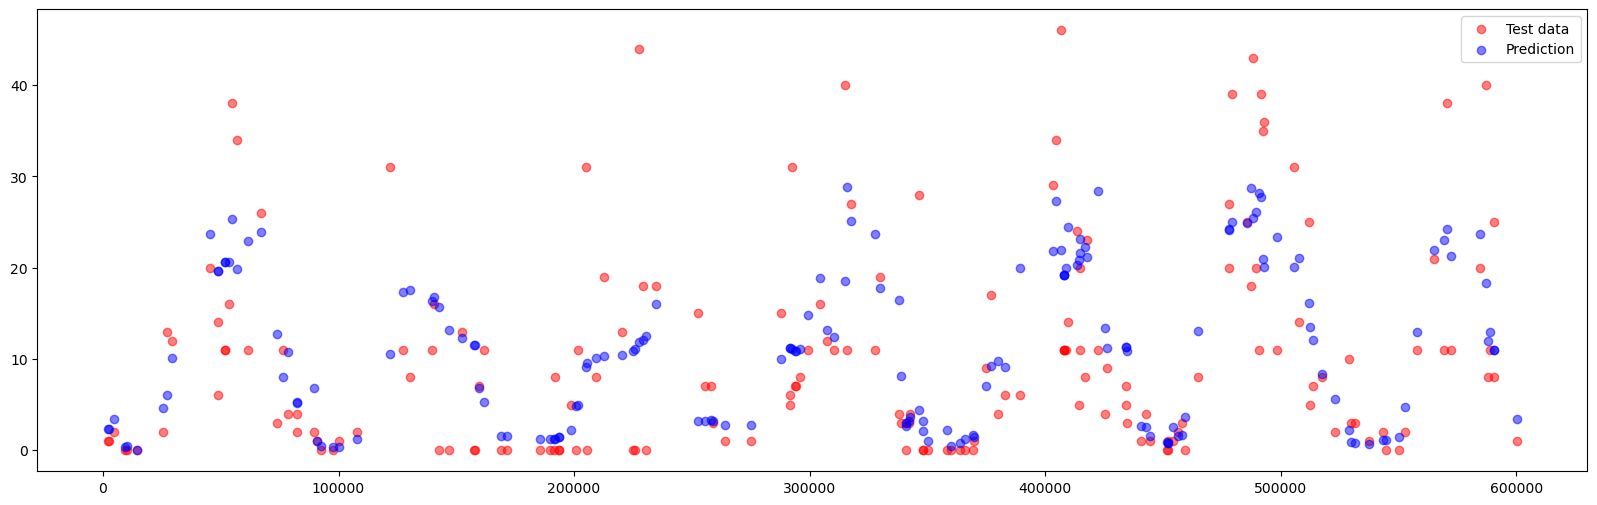

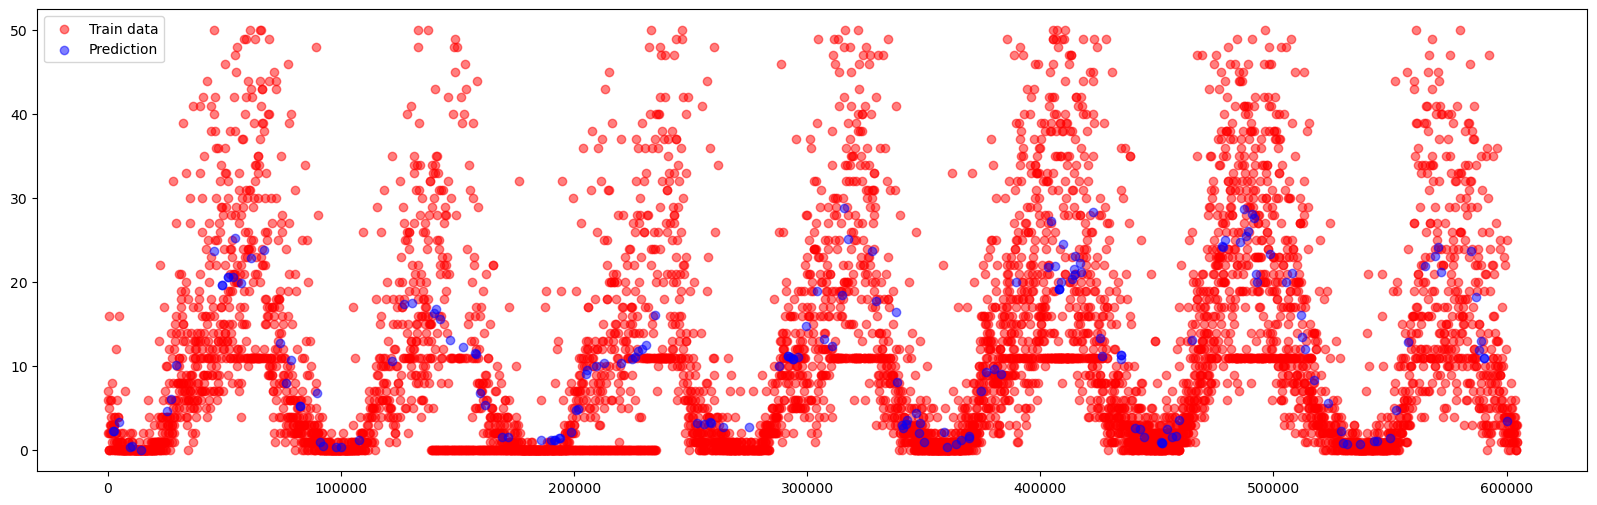

Sensor: EAST_N17/056x1
MAE: 6.132787161618264
MSE: 73.7800681105671
R2: -0.0019540185309523395
-----------------------------------


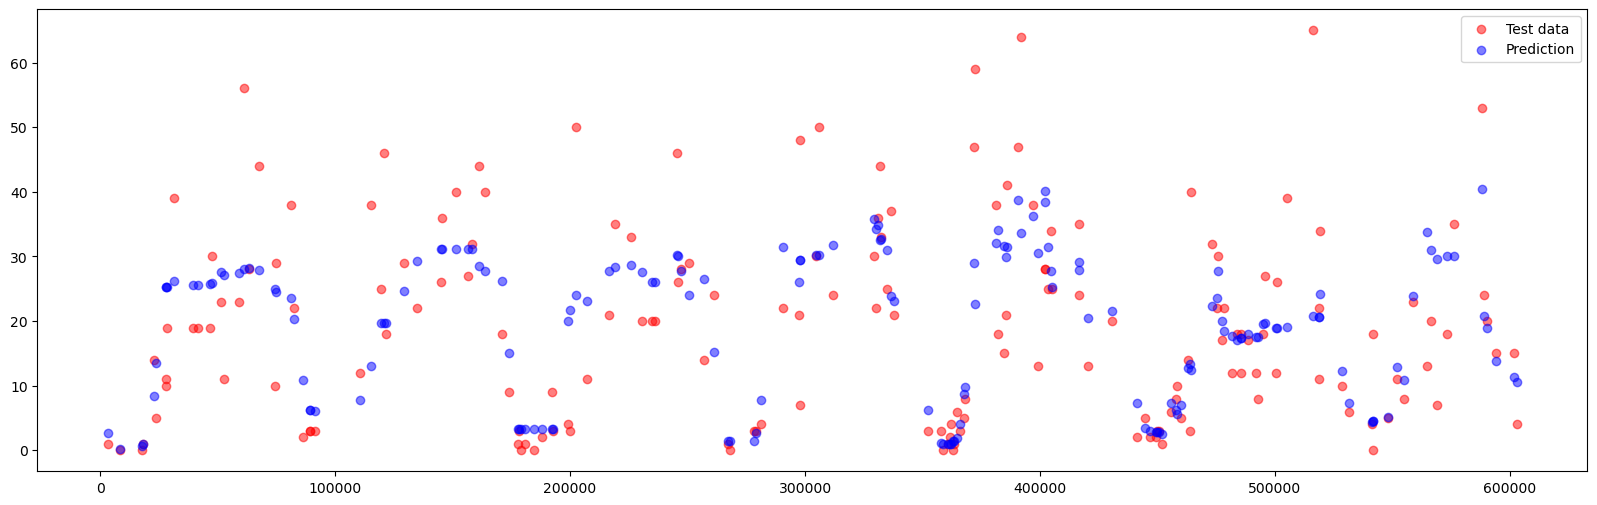

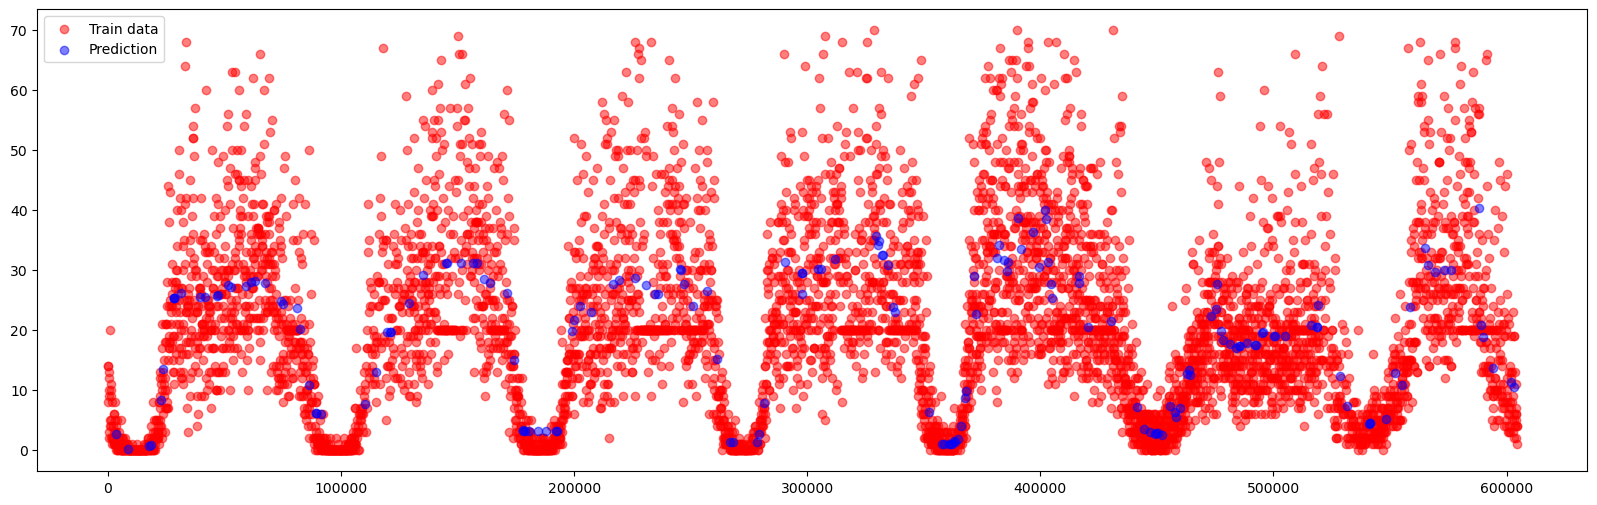

Sensor: CNTR_N12/090b2
MAE: 7.214443845164509
MSE: 108.16764477152519
R2: 0.1369322712666583
-----------------------------------


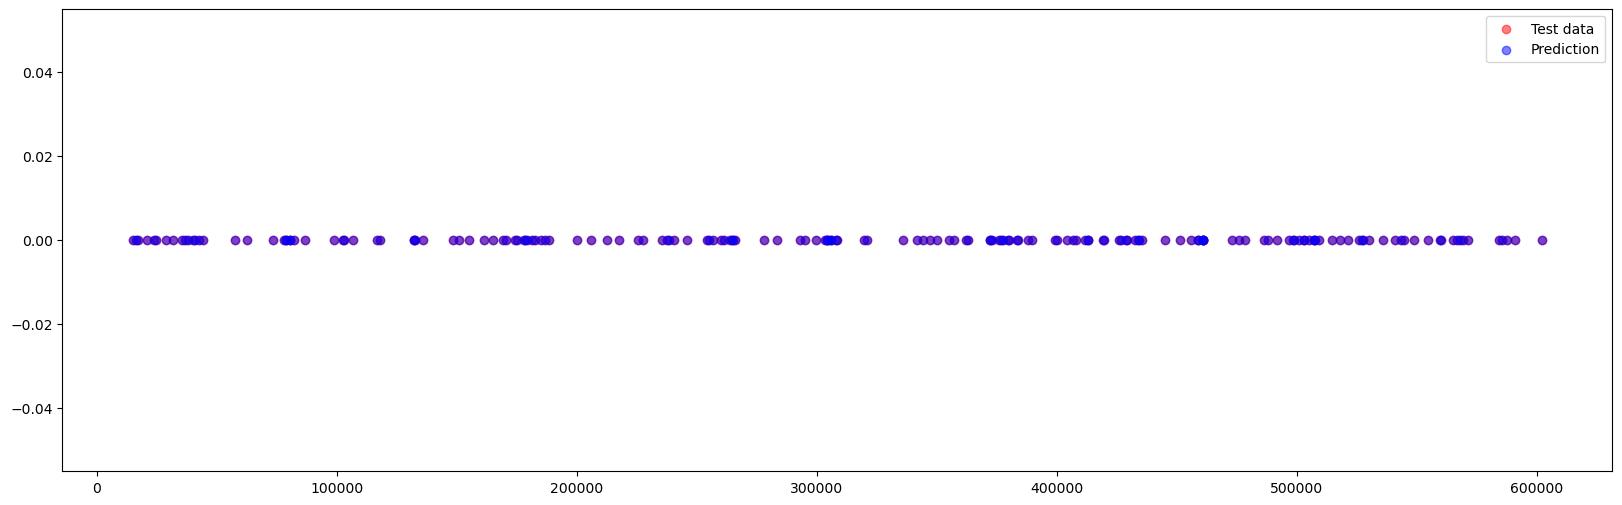

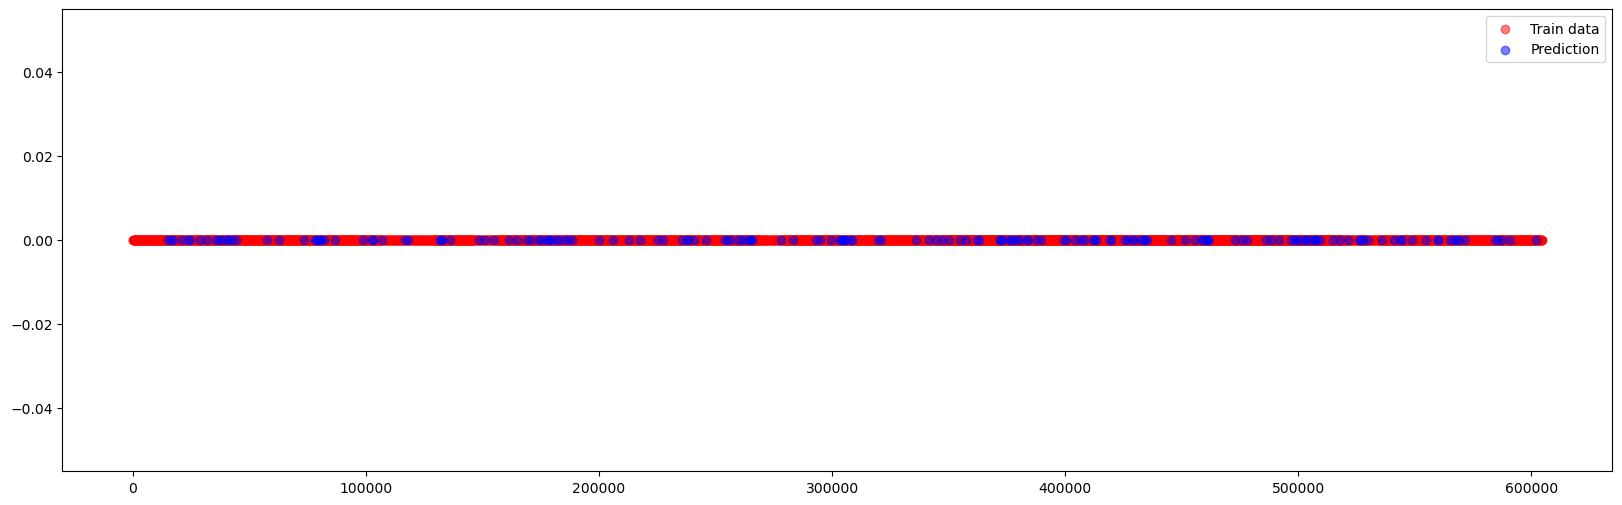

Sensor: EAST_N04/018a1
MAE: 0.0
MSE: 0.0
R2: 1.0
-----------------------------------


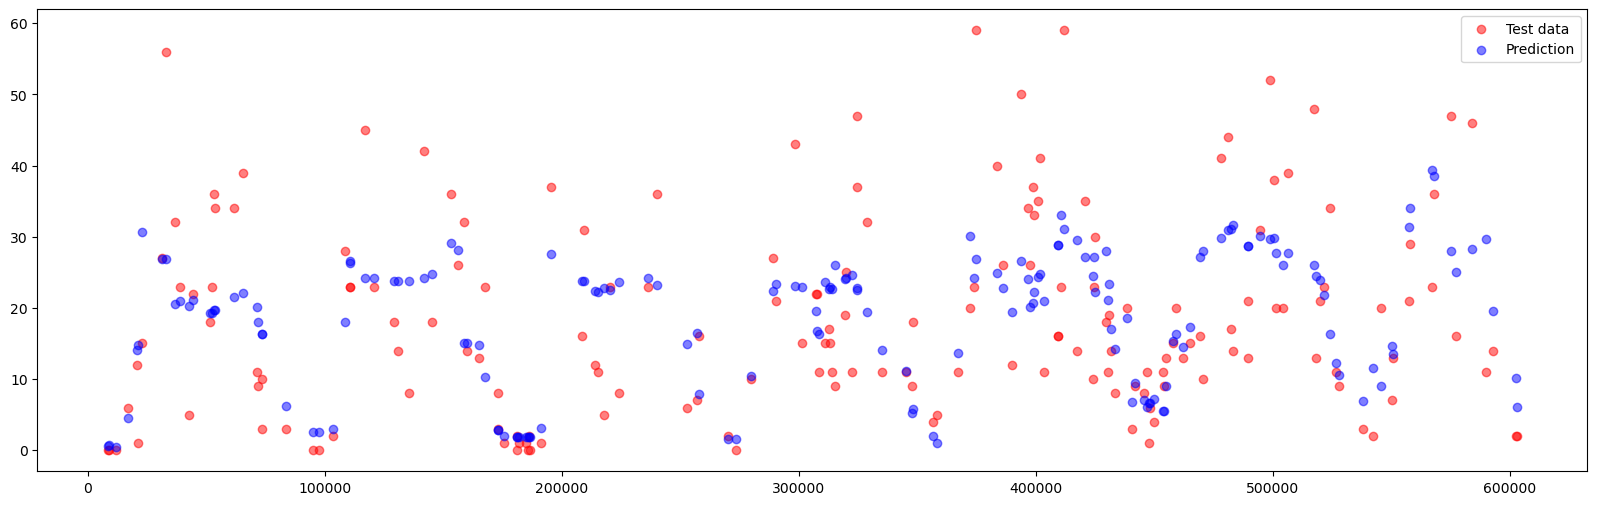

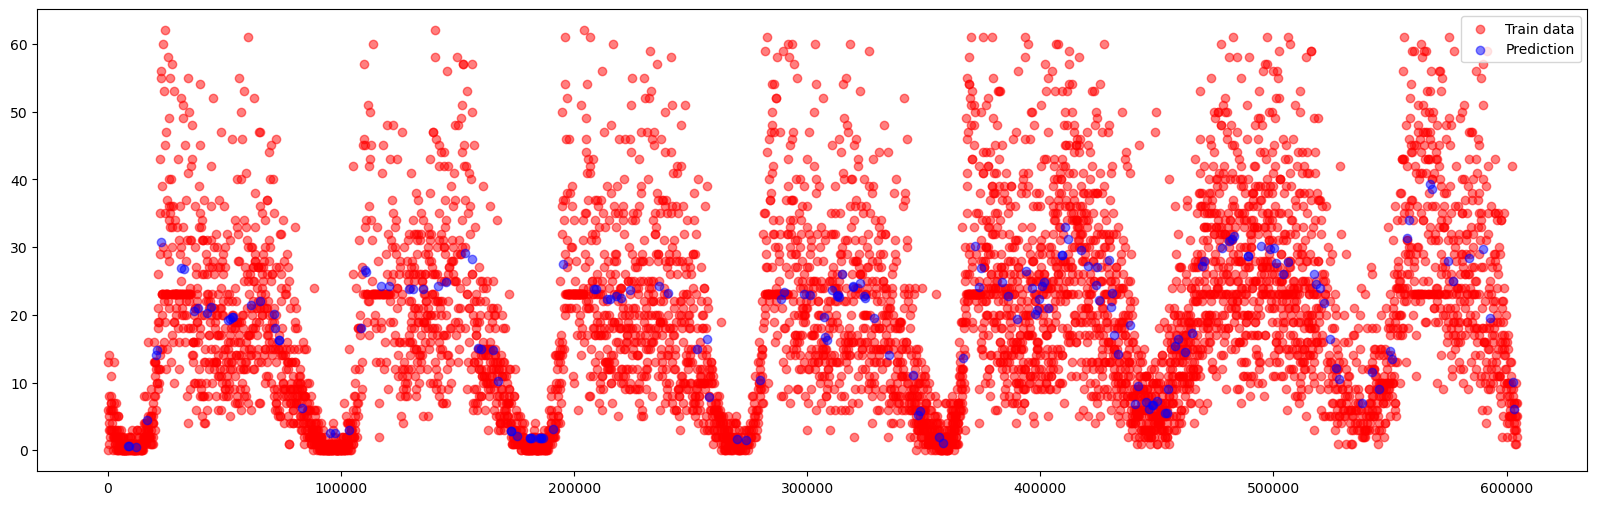

Sensor: SOUT_N09/164x1
MAE: 8.06840296936082
MSE: 109.51952056204799
R2: -0.24797856237361393
-----------------------------------


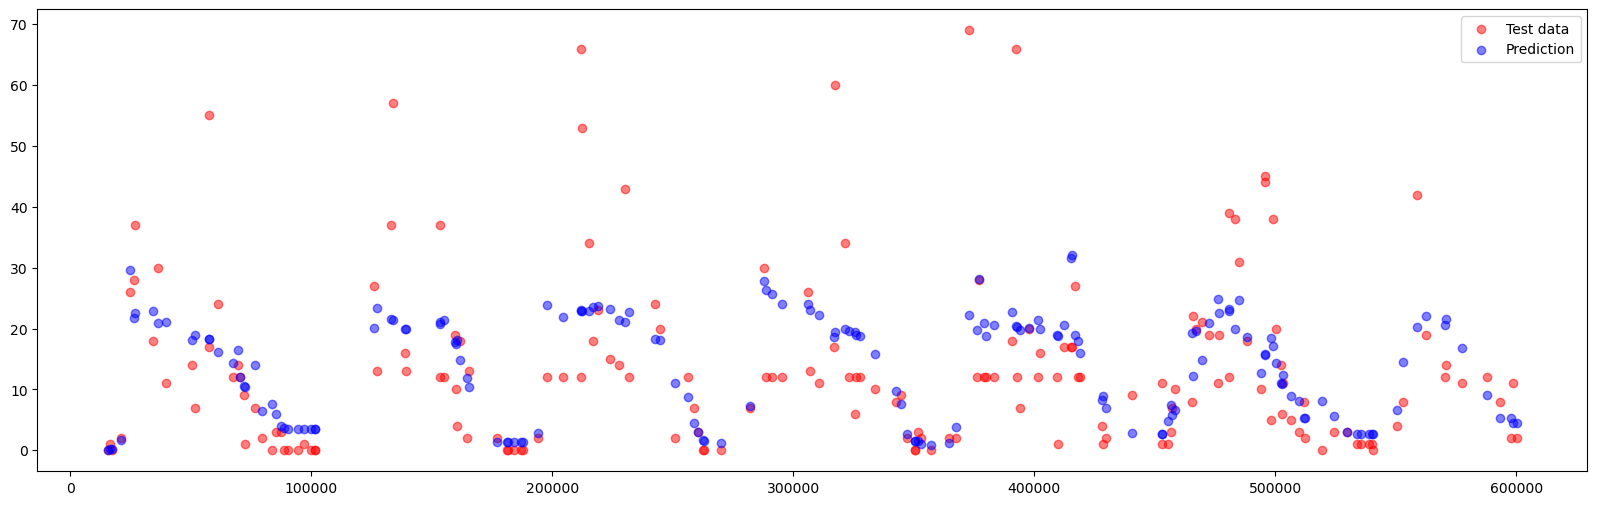

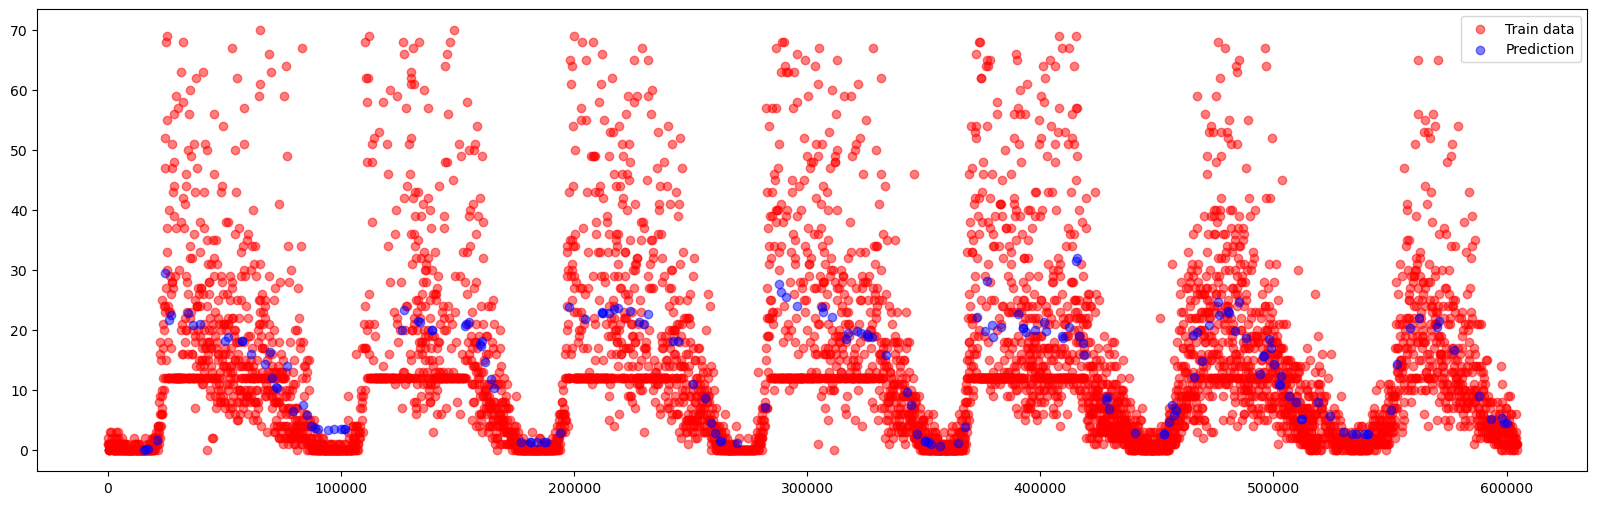

Sensor: CNTR_N12/057c1
MAE: 7.411729104667716
MSE: 127.61662506271847
R2: -0.7844534315569192
-----------------------------------


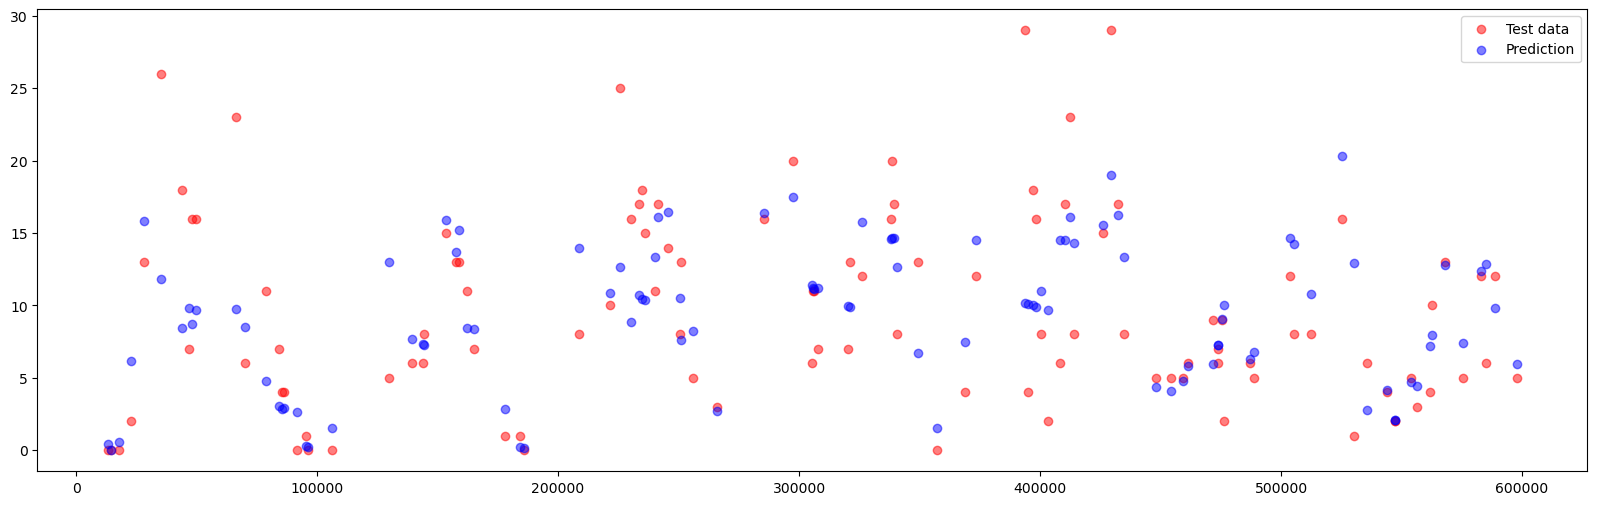

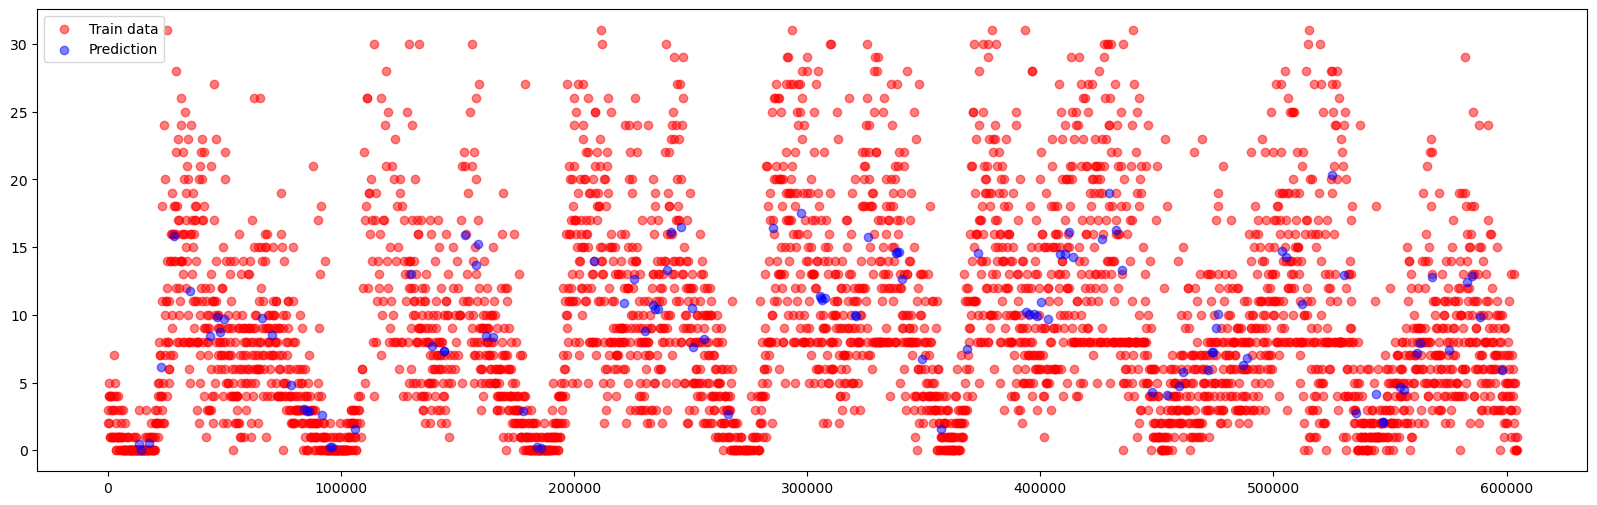

Sensor: NORT_N04/197z1
MAE: 3.5009196599819323
MSE: 24.390352063310072
R2: -0.03224994924556279
-----------------------------------
Mean MAE:  6.308506096407055
Mean MSE:  128.72865411238354
Mean R2:  -1.9097386219533394


In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

np.random.seed(2)
sensors = random_elements = np.random.choice(train_data['detid'], size=10, replace=False)

mean_MAE, mean_MSE, mean_R2 = rfr_regressor_loop(train_data, test_data, sensors, param_grid)
print('Mean MAE: ', mean_MAE)
print('Mean MSE: ', mean_MSE)
print('Mean R2: ', mean_R2)